# <center>Traitement d'images<center>
    
Nous avons crée une structure Mola :
<img src="Image/2021_0111_16354600.jpg"  width="300" />

Puis nous avons mis un poids sur un des points : <img src="Image/2021_0111_16353200.jpg"  width="300" />

    
Nous observons un changement entre les deux photos, en effet les points se déplcement. Le but de ce programme va être de calculer les vecteurs déplacements entre ces deux points.

Sur cette image nous voyons la différence de position des points entre les deux photos.
    
<img src="Image/comparaison.png"  width="300" />
Nous nous sommes aidées de : http://www.tangentex.com/BibliothequeCodes.htm#Ind66

In [1]:
#Importation des bibliothéques
import sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


## Ouverture récupération des données des images


Grâce à la bibliothéque PIL on ouvre les images.
Les points intéressant sont les points jaunes qui sont au centre des pastilles points rouges 
<img src="Image/zoom.png"  width="300" />
Ce jaune est RGB(174,92,0). De ce fait on va récupérer sur les deux images les coordonnées des pixels jaunes.

In [2]:
# ouverture des fichiers images
ImageFile1 = "Image/2021_0111_16354600.jpg"
ImageFile2 = "Image/2021_0111_16353200.jpg"

try:
  img1 = Image.open(ImageFile1)
  img2 = Image.open(ImageFile2)



except IOError:
  print ('Erreur sur ouverture du fichier ' + ImageFile1)
  sys.exit(1)

colonne1,ligne1 = img1.size 
colonne2,ligne2 = img2.size 

def conversion_image(img):
    colonne,ligne = img.size
    imgF = Image.new(img.mode,img.size) 
    x = []
    y = []
    progression = 0
    for i in range(ligne):
        if progression < round(i/ligne*10):
            print(str(round(i/ligne*10))+'0%')
            progression = round(i/ligne*10)
        for j in range(colonne):  
            pixel = img.getpixel((j,i)) # récupération du pixel
            #(174,92,0)
            if pixel[0] < 194 and pixel[0]>154 and pixel[1] < 112 and pixel[1]>72 and pixel[2] < 31 and pixel[2]>0:
                p = (0 , 0 , 0 )
                x.append(i)
                y.append(j)
            else:
                p =(255,255,255)
            imgF.putpixel((j,i), p)
    img.show()
    return x,y

x1,y1 = conversion_image(img1)
x2,y2 = conversion_image(img2)


img1.close()
img2.close()

10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


## Récupération des coordonnées des 4 points 

Grace à la fonction coordonnee_point, on va pouvoir calculer la coordonnée moyenne. 
Cette photo montre la répartition des poinst comme on le voit les points ne sont pas ordonnés. La fonction ci-dessous va regrouper les cordonnées proches et va en faire une moyenne.
<img src="Image/calc2.PNG"  width="300" />
On en déduit ainsi la coordonnée moyenne pour chaucun des points jaunes sur chacunes des photos.

In [3]:
#Calcul la valeur moyenne du noeud
nbre_point = 4
def coordonnee_point(nbre_point,n1,n2):
    X = np.zeros((3,nbre_point))
    Y = np.zeros((3,nbre_point))    
    for j in range(nbre_point):
        X[0,j] = n1[0]
        Y[0,j] = n2[0]
        X[1,j] = n1[0]
        Y[1,j] = n2[0]
        X[2,j] = 1
        Y[2,j] = 1
        list1 = [0]
        k = 1
        for i in range (1,len(n1)):
            if n1[i] < X[0,j] + 20 and n1[i] > X[0,j] - 20 and  n2[i] < Y[0,j] + 20 and n2[i] > Y[0,j] - 20:
                X[1,j] += n1[i]
                Y[1,j] += n2[i]
                X[2,j] += 1
                Y[2,j] += 1
                list1.append(i-k)
                k+=1       
        if j < nbre_point-1:
            for i in range(len(list1)):
                del n1[list1[i]]
                del n2[list1[i]]

        X[0,j] = X[1,j]/X[2,j]
        Y[0,j] = Y[1,j]/Y[2,j]
    return X[0], Y[0]

nx1,nx2 = coordonnee_point(nbre_point,x1,y1)
rx1,rx2 = coordonnee_point(nbre_point,x2,y2)


## Trouver le binome 
Nous obtenons ainsi des coordonnées de points mais le point 1 de la liste 1 n'est pas forcement le point 1 de la liste 2 (cf illustration ci dessous). De ce fait la fonction binome permet de trouver les correspondances des points entre la photo 1 et la photo 2.
<img src="Image/pts.png"  width="300" /><p style="text-align: center;"> Figure.1 : Listes coordonnées moyennes pour les deux photos</p>



In [4]:
#permet de trouver  la correspondance des noeuds entre la photo1 et la photo2
def binome(x1,x2,y1,y2):
    L = []
    for i in range(len(x2)):
        for j in range(len(x2)):

            if x1[i] < x2[j] + 50 and x1[i] > x2[j] - 50 and  y1[i] <  y2[j] + 50 and y1[i] > y2[j] - 50:
                L.append([i,j])
    return L
B = binome(nx1, rx1, nx2, rx2)
print(B)

[[0, 1], [1, 0], [2, 2], [3, 3]]


## Calcul du déplcement 

Maintenant, nous pouvons calculer la distance entre chaqu'un des points d'après la formule suivante:
$$
\left\{
    \begin{array}{ll}
        x = x_{1} - x_{2}\\
        y = y_{1} - y_{2}
    \end{array}
\right.
$$

In [5]:
L = np.zeros((4, nbre_point))    
for i in range(len(B)):
    c1 = B[i][0]
    c2 = B[i][1]
    L[0,i] = nx1[c2]
    L[1,i] = nx2[c2]
    L[2,i] = rx1[c1] - nx1[c2]
    L[3,i] = rx2[c1] - nx2[c2]

## Mise à l'échelle
Nous travaillons avec des pixels. Il nous faut donc faire une conversion de pixel en cm. On calcule ainsi le coeff de conversion grâce à un témoin qui est la distance entre deux points.

In [6]:
#Mise à l'échelle en cm CONVERSION PIXEL EN CM
taille =17.5
def conversion(nx2,taille):
    coeff = taille/abs(nx2[1]-nx2[0])
    return coeff
coeff = conversion(nx2,17.5)



## Représentation graphique et résultat analytique

Grâce à une des bibliothéque de pyplot on affiche l'image. Ensuite on affiche les vecteurs déplacements(qui ne sont pas à l'échelle). Et on montre les résultats des déplcaments en fonction de chacun des points.

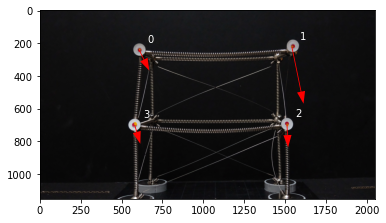

In [7]:
#Montre graphique le déplacement
img = mpimg.imread('Image/2021_0111_16354600.jpg')
plt.imshow(img)

#Montre graphique le déplacement
for i in range(nbre_point):
    plt.text(L[1,i]+50,L[0,i]-50,i,color="white")
    #plt.quiver(L[1,i],L[0,i], L[3,i], L[2,i], color='g')
    plt.arrow(L[1,i],L[0,i], L[3,i]*10, L[2,i]*10,zorder=20,
                  head_width=50, lw=0, width=5, color="red")

plt.show()


In [8]:
#Résultat
for i in range(len(nx1)):   
    print("le déplacemnt au noeud ",i,"est de x = ",coeff*L[3,i],"cm","y =",coeff*L[2,i],"cm")

le déplacemnt au noeud  0 est de x =  0.053379003425257344 cm y = 0.10897266763092334 cm
le déplacemnt au noeud  1 est de x =  0.10501606127429626 cm y = 0.5112243515475693 cm
le déplacemnt au noeud  2 est de x =  0.005621831211808119 cm y = 0.11843324419544325 cm
le déplacemnt au noeud  3 est de x =  0.022420398285190234 cm y = 0.07495774949078628 cm
